In [ ]:
# Detection of phishing websites it is really important problem, especially for people that are not so-called digital-natives.
# Sometimes even young, but not so careful people can be deceived by fraudulent websites asking to send your login and password.
# This makes a real chance for machine learning to show its full strength out of the problem. Solution can really ease people's 
# lifes, especially old people, that usually become a simple target for scammers

In [ ]:
# Importing libraries, reading data

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [86]:
data=pd.read_csv('phpV5QYya.csv')
pd.set_option('display.max_columns', 31)

In [87]:
data.shape

(11055, 31)

In [ ]:
# Let's check how many missing values in our data

In [163]:
data.isnull().sum().sum()

0

In [ ]:
# There are no missing values

In [ ]:
# Let's look at our variables

In [88]:
data.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1


In [ ]:
# As we can see, all of our variable are already encoded categorical and almost all are binary, that means there is no need
# in neither encoding nor scale them. We won't scale non-binary since the scale of them and binary ones is very close and will
# not give us sugnificant gain in scores

In [ ]:
# Let's check how balanced our data

In [89]:
print(data.Result[data.Result==1].count())
print(data.Result[data.Result==-1].count())

6157
4898


In [ ]:
# The proportion is close to 50/50, so data is well-balanced

In [90]:
X=data.drop('Result', axis=1)
y=data.Result

In [91]:
# Let's look at how the age of a domain may indicate whether it is phishing or not

Text(0.5, 1.0, 'How the age of domain can indicate phishing website')

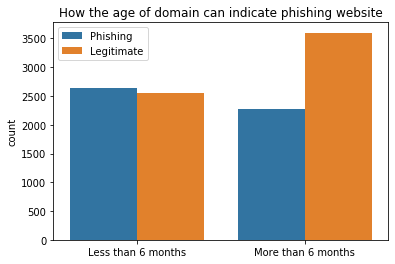

In [92]:
age=[]
for i in range(0,data["age_of_domain"].shape[0]):
    if data["age_of_domain"][i]==-1:
        age=age+['Less than 6 months']
    else:
        age=age+['More than 6 months']
result=[]
for i in range(0,data['Result'].shape[0]):
    if data['Result'][i]==-1:
        result=result+['Phishing']
    else:
        result=result+['Legitimate']


ax = sns.countplot(x=age, hue=result)
plt.title('How the age of domain can indicate phishing website')

In [93]:
# Left columns (-1) is a case when domain exists less than 6 months, right - if more. Result -1 means that site is phishing.
# It is clearly seen that from among young domains there are more of fraudulent than among old domains.

In [94]:
# Let's look at how web traffic may indicate whether it is phishing or not

Text(0.5, 1.0, 'How the web traffic can indicate phishing website')

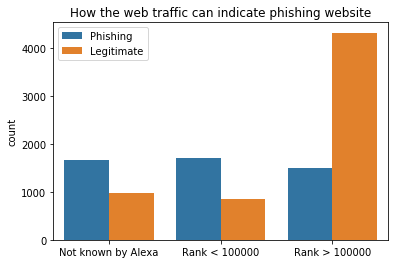

In [95]:
traffic=[]
for i in range(0,data["web_traffic"].shape[0]):
    if data["web_traffic"][i]==-1:
        traffic=traffic+['Not known by Alexa']
    elif data["web_traffic"][i]==0:
        traffic=traffic+['Rank < 100000']
    elif data["web_traffic"][i]==1:
        traffic=traffic+['Rank > 100000']
ax = sns.countplot(x=traffic, hue=result)
plt.title('How the web traffic can indicate phishing website')


In [ ]:
# We can see, that the less site visited the more probability for it to be a phishing site

In [ ]:
# Let's train some models to predict whether site is phishing or not

In [ ]:
# Splitting data to train and test (without stratifying, our data is balanced)

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, make_scorer,auc
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


In [ ]:
# For any further modeling assume Accuracy as a measure of quality, and we will use usual KFold, as our target variable is
# balanced. I will also calculate Precision, Recall, F1 and roc_auc to confirm that my choice was right.

In [97]:
# Logistic Regression

In [98]:

logreg=LogisticRegression(solver='liblinear')
parameters = {}
parameters['penalty'] = ['l1', 'l2']
parameters['C'] = [10**x for x in range(-7,7)]

scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': make_scorer(precision_score), \
'Recall': make_scorer(recall_score), 'F1': make_scorer(f1_score)}

cv = KFold(n_splits=3, shuffle=True, random_state=5)

gs = GridSearchCV(estimator=logreg,
                          param_grid=parameters,
                          cv=cv,
                          scoring=scoring,
                          n_jobs=-1, refit='Accuracy')

In [99]:
gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=5, shuffle=True),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='w...
             param_grid={'C': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                               10, 100, 1000, 10000, 100000, 1000000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit='Accuracy',
             return_train_score=Fal

In [126]:
y_test_pred=gs.predict(X_test)
print('Best parameters are:', gs.best_params_)
print('Accuracy on train set:', gs.best_score_)
print('Accuracy on test set:' ,accuracy_score(y_test_pred, y_test))

Best parameters are: {'C': 0.1, 'penalty': 'l2'}
Accuracy on train set: 0.9265468580388373
Accuracy on test set: 0.9323444283646889


In [101]:
result_scores=pd.DataFrame([gs.cv_results_['mean_test_AUC'][gs.best_index_],gs.cv_results_['mean_test_Accuracy'][gs.best_index_],\
gs.cv_results_['mean_test_Precision'][gs.best_index_],gs.cv_results_['mean_test_Recall'][gs.best_index_],\
gs.cv_results_['mean_test_F1'][gs.best_index_]])
result_scores.index=['AUC','Accuracy','Precision','Recall','F1']
result_scores.columns=['score']
print(result_scores)

              score
AUC        0.976819
Accuracy   0.926547
Precision  0.924041
Recall     0.945738
F1         0.934730


In [103]:
# Decision Tree Classifier

In [104]:
from sklearn.tree import DecisionTreeClassifier

In [105]:
dtc=DecisionTreeClassifier()
parameters = {}
parameters['max_depth'] = range(1,40)

gs_dtc = GridSearchCV(estimator=dtc,
                          param_grid=parameters,
                          cv=cv,
                          scoring=scoring,
                          n_jobs=-1, refit='Accuracy')

In [106]:
gs_dtc.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=5, shuffle=True),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1, param_grid={'max_depth': range(1, 40)},
             pre_dispatch='2*n_jobs', r

In [125]:
y_test_pred=gs_dtc.predict(X_test)
print('Best parameters are:', gs_dtc.best_params_)
print('Accuracy on train set:', gs_dtc.best_score_)
print('Accuracy on test set:' ,accuracy_score(y_test_pred, y_test))

Best parameters are: {'max_depth': 21}
Accuracy on train set: 0.9560969726209142
Accuracy on test set: 0.9638205499276411


In [108]:
result_scores_dtc=pd.DataFrame([gs_dtc.cv_results_['mean_test_AUC'][gs_dtc.best_index_],gs_dtc.cv_results_['mean_test_Accuracy'][gs_dtc.best_index_],\
gs_dtc.cv_results_['mean_test_Precision'][gs_dtc.best_index_],gs_dtc.cv_results_['mean_test_Recall'][gs_dtc.best_index_],\
gs_dtc.cv_results_['mean_test_F1'][gs_dtc.best_index_]])
result_scores_dtc.index=['AUC','Accuracy','Precision','Recall','F1']
result_scores_dtc.columns=['score']
print(result_scores_dtc)

              score
AUC        0.962621
Accuracy   0.956097
Precision  0.956413
Recall     0.965172
F1         0.960763


In [110]:
# Random Forest

In [111]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [112]:
rfc=RandomForestClassifier()
parameters = {}
parameters['max_depth'] = range(1,40)
parameters['n_estimators'] = range(1,30)

gs_rfc = GridSearchCV(estimator=rfc,
                          param_grid=parameters,
                          cv=cv,
                          scoring=scoring,
                          n_jobs=-1, refit='Accuracy')

In [113]:
gs_rfc.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=5, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,...
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': range(1, 40),
         

In [123]:
y_test_pred=gs_rfc.predict(X_test)
print('Best parameters are:', gs_rfc.best_params_)
print('Accuracy on train set:', gs_rfc.best_score_)
print('Accuracy on test set:' ,accuracy_score(y_test_pred, y_test))

Best parameters are: {'max_depth': 33, 'n_estimators': 24}
Accuracy on training set: 0.969123145579544
Accuracy on test set: 0.9761215629522432


In [115]:
result_scores_rfc=pd.DataFrame([gs_rfc.cv_results_['mean_test_AUC'][gs_rfc.best_index_],gs_rfc.cv_results_['mean_test_Accuracy'][gs_rfc.best_index_],\
gs_rfc.cv_results_['mean_test_Precision'][gs_rfc.best_index_],gs_rfc.cv_results_['mean_test_Recall'][gs_rfc.best_index_],\
gs_rfc.cv_results_['mean_test_F1'][gs_rfc.best_index_]])
result_scores_rfc.index=['AUC','Accuracy','Precision','Recall','F1']
result_scores_rfc.columns=['score']
print(result_scores_rfc)


              score
AUC        0.992602
Accuracy   0.969123
Precision  0.965010
Recall     0.980064
F1         0.972476


In [117]:
# XGBClassifier

In [118]:
xgbc=XGBClassifier()
parameters = {}
parameters['max_depth'] = range(1,20)
parameters['n_estimators'] = range(1,30)

gs_xgbc = GridSearchCV(estimator=xgbc,
                          param_grid=parameters,
                          cv=cv,
                          scoring=scoring,
                          n_jobs=-1, refit='Accuracy')

In [119]:
gs_xgbc.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=5, shuffle=True),
             error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binar...
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': range(1, 20),
                         'n_estimators': range(1, 30)},
             pre_dispatch='2*n_jobs', refit='Accuracy',
             return_train_score=False,
             scoring={'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_scor

In [124]:
y_test_pred=gs_xgbc.predict(X_test)
print('Best parameters are:', gs_xgbc.best_params_)
print('Accuracy on train set::', gs_xgbc.best_score_)
print('Accuracy on train set:' ,accuracy_score(y_test_pred, y_test))

Best parameters are: {'max_depth': 18, 'n_estimators': 29}
Accuracy on train set:: 0.9594741285731516
Accuracy on train set: 0.9696092619392185


In [121]:
result_scores_xgbc=pd.DataFrame([gs_xgbc.cv_results_['mean_test_AUC'][gs_xgbc.best_index_],gs_xgbc.cv_results_['mean_test_Accuracy'][gs_xgbc.best_index_],\
gs_xgbc.cv_results_['mean_test_Precision'][gs_xgbc.best_index_],gs_xgbc.cv_results_['mean_test_Recall'][gs_xgbc.best_index_],\
gs_xgbc.cv_results_['mean_test_F1'][gs_xgbc.best_index_]])
result_scores_xgbc.index=['AUC','Accuracy','Precision','Recall','F1']
result_scores_xgbc.columns=['score']
print(result_scores_xgbc)

              score
AUC        0.992690
Accuracy   0.959474
Precision  0.958439
Recall     0.969249
F1         0.963812


In [ ]:
# Let's create Max_depth-Score dependancy for the best cassifier

In [149]:
rfc=RandomForestClassifier(n_estimators=24)
parameters = {}
parameters['max_depth'] = range(1,60)

gs_rfc = GridSearchCV(estimator=rfc,
                          param_grid=parameters,
                          cv=cv,
                          scoring=scoring,
                          n_jobs=-1, refit='Accuracy')

In [150]:
gs_rfc.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=5, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,...
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='warn', n_jobs=-1

Text(0.5, 1.0, 'How maximum depth of a tree influences Accuracy')

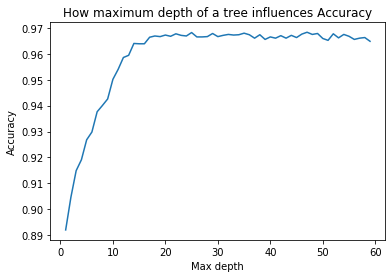

In [154]:
sns.lineplot(x=range(1,60), y=gs_rfc.cv_results_['mean_test_Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.title('How maximum depth of a tree influences Accuracy')

In [ ]:
# Let's look ar precision recall cureve

XGB: f1=0.973
Logistic: f1=0.940
DTC: f1=0.968
RFC: f1=0.976


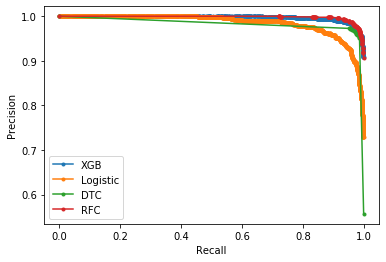

In [156]:
from sklearn.metrics import precision_recall_curve
# predict probabilities
xgbc_probs = gs_xgbc.predict_proba(X_test)
lr_probs = gs.predict_proba(X_test)
dtc_probs = gs_dtc.predict_proba(X_test)
rfc_probs = gs_rfc.predict_proba(X_test)
xgbc_probs = xgbc_probs[:, 1]
lr_probs = lr_probs[:, 1]
dtc_probs = dtc_probs[:, 1]
rfc_probs = rfc_probs[:, 1]
# predict values
y_xgbc_pred = gs_xgbc.predict(X_test)
y_lr_pred = gs.predict(X_test)
y_dtc_pred = gs_dtc.predict(X_test)
y_rfc_pred = gs_rfc.predict(X_test)
# calculate precision and recall for each threshold
xgbc_precision, xgbc_recall, _ = precision_recall_curve(y_test, xgbc_probs)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
dtc_precision, dtc_recall, _ = precision_recall_curve(y_test, dtc_probs)
rfc_precision, rfc_recall, _ = precision_recall_curve(y_test, rfc_probs)
# calculate scores
xgbc_f1 = f1_score(y_test, y_xgbc_pred)
lr_f1 = f1_score(y_test, y_lr_pred)
dtc_f1 = f1_score(y_test, y_dtc_pred)
rfc_f1 = f1_score(y_test, y_rfc_pred)
# summarize scores
print('XGB: f1=%.3f' % (xgbc_f1))
print('Logistic: f1=%.3f' % (lr_f1))
print('DTC: f1=%.3f' % (dtc_f1))
print('RFC: f1=%.3f' % (rfc_f1))
# plot the precision-recall curves
plt.plot(xgbc_recall, xgbc_precision, marker='.', label='XGB')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
plt.plot(dtc_recall, dtc_precision, marker='.', label='DTC')
plt.plot(rfc_recall, rfc_precision, marker='.', label='RFC')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
# We can see again, that RFC shows the best result, since the area under curve is the largest

In [ ]:
# All my manipulations with models allowed me to create the ML model, that with appriximately 97% of accuracy can say if any 
# site is phishing or just a usual website. I don't think I'm the first one who solved this problem since this dataset is open
# for already some years. But still it was a great lesson how to use data science and machine learning to solve such important
# problems.
# I think that this data I wiorked with was too much processed, probably If I had the original data with continious variables
# I could get more accurate predictions
# I suppose in real life this ML algorithms are already used as extensions or toolbars in browsers. 